In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [2]:
df_music = pd.read_csv('../music_data/billboard_top_100_1960_1969.csv')

In [3]:
df_music.describe(include='all')

,Rank,Artist,Title,Year,SpotifyPlayCount
count,1000.000000,1000,1000,1000.000000,1.000000e+03
unique,NaN,547,987,NaN,NaN
top,NaN,The Beatles,Light My Fire,NaN,NaN
freq,NaN,23,2,NaN,NaN
mean,50.547000,NaN,NaN,1964.501000,7.899716e+06
std,28.922799,NaN,NaN,2.875111,1.992259e+07
min,1.000000,NaN,NaN,1960.000000,1.554000e+03
25%,25.750000,NaN,NaN,1962.000000,2.437070e+05
50%,50.500000,NaN,NaN,1964.500000,8.641245e+05
75%,76.000000,NaN,NaN,1967.000000,4.963935e+06


In [4]:
music_website= pd.read_csv('../music_data/music.csv')

In [36]:
feature_list=['artist.name','latitude','longitude','location']
music_1=music_website[feature_list]

In [37]:
music_1.columns=['Artist','latitude','longitude','location']

In [38]:
music_new=pd.merge(music_1,df_music, on='Artist')

In [39]:
music_new.describe()

,latitude,longitude,Rank,Year,SpotifyPlayCount
count,672.000000,672.000000,672.000000,672.000000,6.720000e+02
mean,39.554593,-67.189288,50.044643,1963.903274,1.121129e+07
std,8.404853,33.490883,30.590869,2.993961,2.655869e+07
min,-33.962430,-118.492290,1.000000,1960.000000,1.882000e+03
25%,35.149680,-84.294408,22.000000,1961.000000,3.201280e+05
50%,38.139920,-74.123740,52.000000,1963.000000,1.556196e+06
75%,41.260690,-63.933358,77.000000,1967.000000,8.098285e+06
max,56.153000,69.867990,100.000000,1969.000000,1.702140e+08


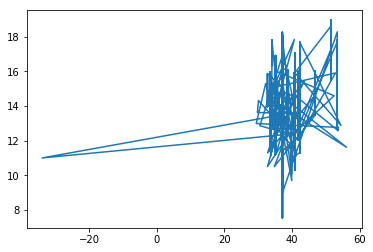

In [42]:
X=music_new['latitude']
Y=np.log(music_new['SpotifyPlayCount'])
plt.plot(X,Y)
plt.show()

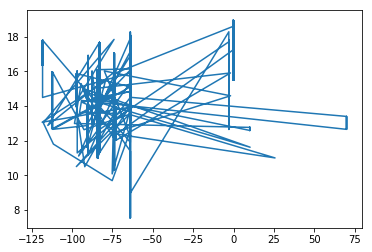

In [43]:
X=music_new['longitude']
Y=np.log(music_new['SpotifyPlayCount'])
plt.plot(X,Y)
plt.show()

In [30]:
music_new

,Artist,latitude,longitude,location,Rank,Title,Year,SpotifyPlayCount
0,The Box Tops,35.149680,-90.048920,"Memphis, TN",2,The Letter,1967,22113106
1,The Box Tops,35.149680,-90.048920,"Memphis, TN",16,Cry Like A Baby,1968,614571
2,The Box Tops,35.149680,-90.048920,"Memphis, TN",98,Soul Deep,1969,306962
3,The Box Tops,35.149680,-90.048920,"Memphis, TN",100,Sweet Cream Ladies,1969,72768
4,The Box Tops,35.149680,-90.048920,"Memphis, TN",2,The Letter,1967,22113106
5,The Box Tops,35.149680,-90.048920,"Memphis, TN",16,Cry Like A Baby,1968,614571
6,The Box Tops,35.149680,-90.048920,"Memphis, TN",98,Soul Deep,1969,306962
7,The Box Tops,35.149680,-90.048920,"Memphis, TN",100,Sweet Cream Ladies,1969,72768
8,The Box Tops,35.149680,-90.048920,"Memphis, TN",2,The Letter,1967,22113106
9,The Box Tops,35.149680,-90.048920,"Memphis, TN",16,Cry Like A Baby,1968,614571


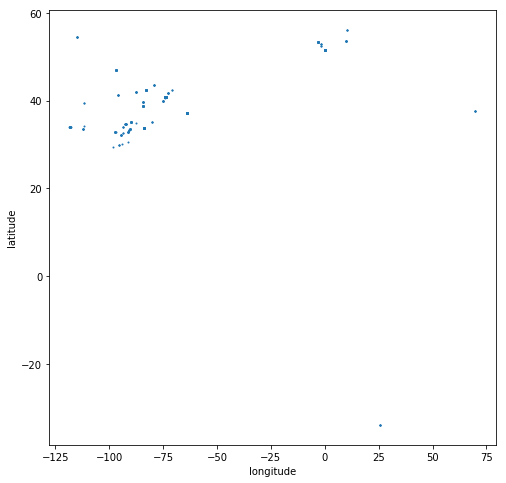

In [31]:
X = 'longitude'
Y = 'latitude'

music_new = music_new.loc[:,[X, Y]]
music_new.dropna(how='any', inplace=True)
music_new.plot.scatter(x=X, y=Y, s=1, figsize=(8,8))

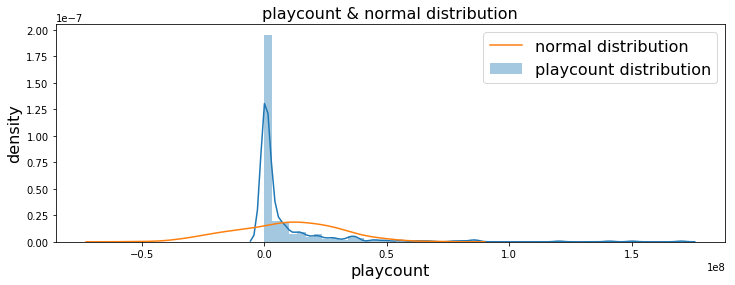

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(song['playcount'],label='playcount distribution')
sns.distplot(sp.stats.norm.rvs(sp.stats.tmean(song['playcount']), 
                  sp.stats.tstd(song['playcount']),
                  size=334), hist=False, label='normal distribution')
ax.set_xlabel('playcount', size=16)
ax.set_ylabel('density', size=16)
ax.legend(fontsize=16)
ax.set_title('playcount & normal distribution', size=16)